## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0421 20:25:11.591436  8476 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0421 20:25:11.592436  8476 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0421 20:25:11.604436  8476 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0421 20:25:11.605437  8476 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0421 20:25:11.606435  8476 deprecation_wrapper.py:119] From D:\Anaconda3\li

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.8515 - acc: 0.3361 - val_loss: 1.7412 - val_acc: 0.3689
Epoch 2/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.6071 - acc: 0.4281 - val_loss: 1.6981 - val_acc: 0.3953
Epoch 3/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.5160 - acc: 0.4606 - val_loss: 1.5121 - val_acc: 0.4537
Epoch 4/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.4572 - acc: 0.4823 - val_loss: 1.5337 - val_acc: 0.4495
Epoch 5/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.4065 - acc: 0.4988 - val_loss: 1.4480 - val_acc: 0.4795
Epoch 6/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.3639 - acc: 0.5173 - val_loss: 1.4167 - val_acc: 0.4964
Epoch 7/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.3291 - acc: 0.5280 - val_loss: 1.4406 - val_acc

50000/50000 [==============================] - 2s 38us/step - loss: 1.7945 - acc: 0.3679 - val_loss: 1.7497 - val_acc: 0.3812
Epoch 3/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.7095 - acc: 0.3991 - val_loss: 1.6852 - val_acc: 0.3987
Epoch 4/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.6526 - acc: 0.4199 - val_loss: 1.6337 - val_acc: 0.4219
Epoch 5/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.6072 - acc: 0.4374 - val_loss: 1.5915 - val_acc: 0.4364
Epoch 6/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.5670 - acc: 0.4504 - val_loss: 1.5627 - val_acc: 0.4470
Epoch 7/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.5331 - acc: 0.4627 - val_loss: 1.5494 - val_acc: 0.4530
Epoch 8/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.5026 - acc: 0.4748 - val_loss: 1.5113 - val_acc: 0.4651
Epoch 9/50
50000/50000 [============================

Epoch 4/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.9692 - acc: 0.3132 - val_loss: 1.9504 - val_acc: 0.3206
Epoch 5/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.9331 - acc: 0.3267 - val_loss: 1.9198 - val_acc: 0.3300
Epoch 6/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.9050 - acc: 0.3332 - val_loss: 1.8938 - val_acc: 0.3369
Epoch 7/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.8820 - acc: 0.3420 - val_loss: 1.8745 - val_acc: 0.3442
Epoch 8/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.8629 - acc: 0.3497 - val_loss: 1.8559 - val_acc: 0.3505
Epoch 9/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.8455 - acc: 0.3566 - val_loss: 1.8396 - val_acc: 0.3551
Epoch 10/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.8299 - acc: 0.3614 - val_loss: 1.8258 - val_acc: 0.3598
Epoch 11/50
50000/50000 [===============

50000/50000 [==============================] - 2s 40us/step - loss: 2.2371 - acc: 0.1856 - val_loss: 2.2284 - val_acc: 0.1985
Epoch 6/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.2237 - acc: 0.1981 - val_loss: 2.2154 - val_acc: 0.2102
Epoch 7/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.2109 - acc: 0.2097 - val_loss: 2.2029 - val_acc: 0.2187
Epoch 8/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.1987 - acc: 0.2171 - val_loss: 2.1910 - val_acc: 0.2230
Epoch 9/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.1871 - acc: 0.2227 - val_loss: 2.1796 - val_acc: 0.2305
Epoch 10/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.1760 - acc: 0.2280 - val_loss: 2.1689 - val_acc: 0.2351
Epoch 11/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.1656 - acc: 0.2329 - val_loss: 2.1587 - val_acc: 0.2378
Epoch 12/50
50000/50000 [=========================

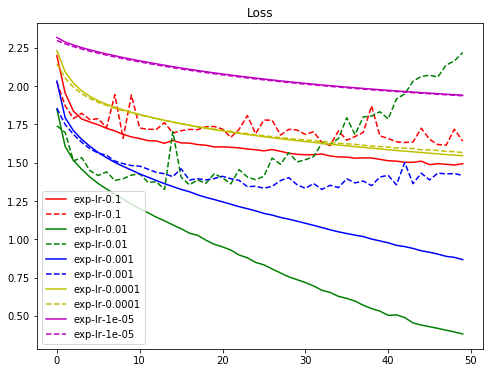

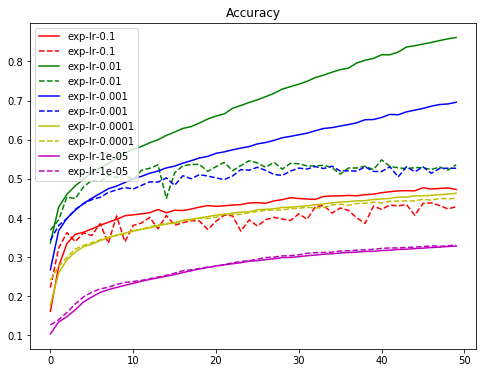

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [10]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.9059 - acc: 0.3082 - val_loss: 1.7640 - val_acc: 0.3670
Epoch 2/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.6883 - acc: 0.3979 - val_loss: 1.6138 - val_acc: 0.4206
Epoch 3/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.6011 - acc: 0.4254 - val_loss: 1.5637 - val_acc: 0.4407
Epoch 4/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.5385 - acc: 0.4506 - val_loss: 1.5598 - val_acc: 0.4462
Epoch 5/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.5019 - acc: 0.4622 - val_loss: 1.5035 - val_acc: 0.4596
Epoch 6/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.4602 - acc: 0.4759 - val_loss: 1.4866 - val_acc: 0.4685
Epoch 7/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.4304 - acc: 0.4901 - val_loss: 1.5261 - val_acc

50000/50000 [==============================] - 2s 38us/step - loss: 1.8119 - acc: 0.3625 - val_loss: 1.7739 - val_acc: 0.3733
Epoch 3/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.7350 - acc: 0.3880 - val_loss: 1.6998 - val_acc: 0.4059
Epoch 4/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.6741 - acc: 0.4124 - val_loss: 1.6534 - val_acc: 0.4169
Epoch 5/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.6315 - acc: 0.4261 - val_loss: 1.6141 - val_acc: 0.4341
Epoch 6/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.5919 - acc: 0.4395 - val_loss: 1.5789 - val_acc: 0.4432
Epoch 7/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.5613 - acc: 0.4485 - val_loss: 1.5548 - val_acc: 0.4521
Epoch 8/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.5334 - acc: 0.4610 - val_loss: 1.5416 - val_acc: 0.4478
Epoch 9/50
50000/50000 [============================

Epoch 4/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.9704 - acc: 0.3075 - val_loss: 1.9471 - val_acc: 0.3188
Epoch 5/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.9301 - acc: 0.3257 - val_loss: 1.9119 - val_acc: 0.3327
Epoch 6/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.8990 - acc: 0.3385 - val_loss: 1.8835 - val_acc: 0.3406
Epoch 7/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.8734 - acc: 0.3473 - val_loss: 1.8605 - val_acc: 0.3514
Epoch 8/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.8525 - acc: 0.3540 - val_loss: 1.8422 - val_acc: 0.3567
Epoch 9/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.8355 - acc: 0.3601 - val_loss: 1.8272 - val_acc: 0.3605
Epoch 10/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.8198 - acc: 0.3651 - val_loss: 1.8107 - val_acc: 0.3666
Epoch 11/50
50000/50000 [===============

50000/50000 [==============================] - 2s 38us/step - loss: 2.2475 - acc: 0.1754 - val_loss: 2.2423 - val_acc: 0.1826
Epoch 6/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.2347 - acc: 0.1897 - val_loss: 2.2296 - val_acc: 0.1992
Epoch 7/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.2219 - acc: 0.2026 - val_loss: 2.2169 - val_acc: 0.2149
Epoch 8/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.2092 - acc: 0.2167 - val_loss: 2.2040 - val_acc: 0.2212
Epoch 9/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.1964 - acc: 0.2249 - val_loss: 2.1912 - val_acc: 0.2275
Epoch 10/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.1838 - acc: 0.2322 - val_loss: 2.1787 - val_acc: 0.2303
Epoch 11/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.1716 - acc: 0.2348 - val_loss: 2.1668 - val_acc: 0.2329
Epoch 12/50
50000/50000 [=========================

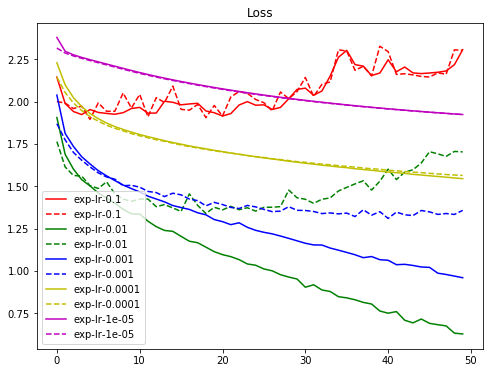

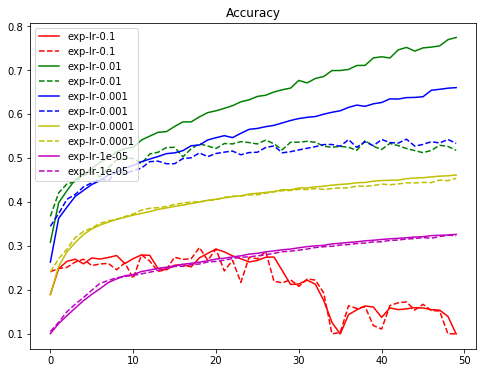

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()